# <center>Conversión YOLOv4 - Tensorflow 2.0</center>

<center><h3>Author:<i> Jorge Rodríguez Castillo</i></h3></center>

<center><h3><i>Dectector de Mascarillas</i></h3></center>

<center><img src='https://user-images.githubusercontent.com/7152507/94377634-feab8b80-00e8-11eb-9bed-dd898e264701.JPG' alt="YOLOv4Daknet YOLOv4 - Tensorflow 2.0"></center>
<center><p>Fuente: Dsbyprateekg</p></center>

Este pequeño notebook explica como convertir un archivo de YOLOv4 a TensorFlow 2.0, en el caso particular que estamos revisando es para un Detector de Mascarillas debido a la pandemia del COVID-19.

## 1. Importación de Librerías

In [1]:
import os
from google.colab import drive

Montamos nuestro Google Drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2. Clonamos Repositorio

En este repositorio podemos obtener todos los archivos necesarios para realizar la conversión de la red YOLOv4 hacia Tensorflow 2.0, es por eso que tenemos que obtener estos archivos. El repositorio original está en [Hunglc007 Tensorflow](https://github.com/hunglc007/tensorflow-yolov4-tflite)

In [ ]:
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git

## 3. Conversión de YOLOv4 -> TensorFlow 2.0

Para empezar debemos tener generado los pesos de nuestra red YOLOv4 para ser convertidas a un modelo de Tensorflow, por lo cual debemos de obtener dichos pesos ejecutando el Notebook **Configuración_YOLOv4.ipynb** o usando los pesos ya generados que se encuentran en: 

Enlace: [Archivos YOLOv4](https://drive.google.com/drive/folders/1gQMWHOCsb4zuPYI9lvJp-62KyTaGXCbt?usp=sharing)


Los archivos que contiene son los siguientes:

<img width="266" alt="Captura de Pantalla 2020-09-21 a la(s) 12 45 06" src="https://user-images.githubusercontent.com/7152507/93801886-54bf9100-fc08-11ea-82cf-51b7caa579d3.png">


El archivo que nos interesa es:
1.   ***yolo-obj_final.weights*** : *Archivo que contiene los pesos generados de YOLOv4*

Copiamos el archivo *yolo-obj_final.weights* hacia la ruta principal */content/*. 

En este caso estoy usando my ruta **/content/gdrive/My Drive/DATASETS/YOLOv4/** pero deberás cambiarla con la ruta donde pusiste los archivos que se han mencionado lineas arriba.

In [4]:
!cp '/content/gdrive/My Drive/DATASETS/YOLOv4/yolo-obj_final.weights' '/content/'

Luego movemos el archivo *yolo-obj_final.weights* hacia la ruta del proyecto clonado */content/tensorflow-yolov4-tflite/data/*

In [5]:
!mv '/content/yolo-obj_final.weights' '/content/tensorflow-yolov4-tflite/data/'

Nos movemos hacia la ruta del proyecto de Github clonado.

In [ ]:
%cd tensorflow-yolov4-tflite

Antes de realizar la generación del modelo de YOLOv4 hacia Tensorflow, tenemos que cambiar las clases que se están usando en el proyecto clonado, por defecto usa las clases de `coco.names`, entonces sobreescribimos este archivo con las clases usadas en la detección de mascarilla que son (`mask_weared_incorrect, with_mask, without_mask`). Si se está usando otras etiquetas debemos ponerlas en la siguiente parte del código.

In [15]:
# @title coco.names
%%writefile coco.names
mask_weared_incorrect
with_mask
without_mask

Writing coco.names


Movemos el archivo generado

In [17]:
!mv coco.names data/classes/

Ejecutamos el siguiente comando para poder generar el modelo en Tensorflow 2.0. No es necesario cambiar ningún parámetro si se utilizan los pesos ya generados, pero si has entrenado con otro dataset y otra configuración lo que se debe de cambiar es el parámetro *--input_size*

In [ ]:
!python save_model.py --weights ./data/yolo-obj_final.weights --output ./checkpoints/yolov4-192 --input_size 192 --model yolov4 

## 4. Pruebas en el modelo Tensorflow 2.0

Ejecutamos el comando de detección para pruebas en base al modelo generado, si se usan los pesos ya generados no se debe realizar ningún cambio, pero si se usa otro dataset y otra configuración en la generación de nuevos pesos lo que se debe cambiar es el parámetro *--size* y la ruta de la imagen en el parámetro *--image*

In [ ]:
!python detect.py --weights ./checkpoints/yolov4-192 --size 192 --model yolov4 --image ./data/test4.jpg

Visualización el resultado de la detección sobre la imagen

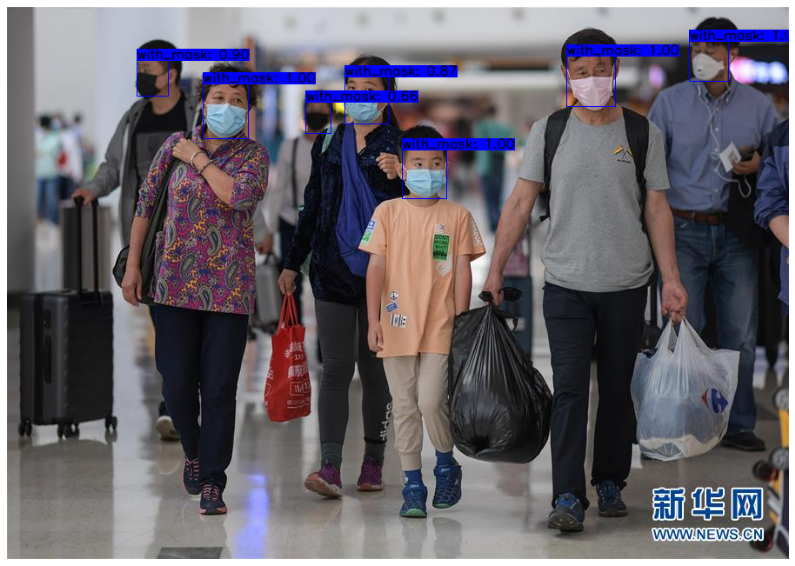

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
image = plt.imread('/content/tensorflow-yolov4-tflite/result.png')

plt.imshow(image)
plt.axis('off')
plt.show()